# Introduction

This notebook provides a basic data visualisation tutorial using Matplotlib (MPL) and Seaborn python library. Please refer to the table below to navegate throught the notebook.

## Table of Content

1. [Matplotlib Basics](#matplotlib-basics)
2. [Importing Libraries](#libraries)
3. [Dataset](#dataset)
3. [Scatterplot](#scatter)
    * [MPL Styling: Adding different markers](#scatter-styling-markers)
    * [MPL Styling: Customise color](#scatter-styling-color)
4. [Bar Chart](#bar)
    * [Useful Functions (getattr and operator)](#bar-useful)
5. [Histogram](#histogram)
6. [Line](#line)
    * [MPL Styling: Line Styling](#line-styling)
    * [MPL Styling: Colourmap](#line-styling-colourmap)
7. [Seaborn](#seaborn)
   * [Basic Plots](#seaborn-basics)
   * [Other Plots](#seaborn-others)

## 1. Matplotlib Basics <a name="matplotlib-basics"></a>

This notebook includes basic instructions about how to create different charts using the library Matplotlib and Seaborn. In python we can use pandas to manipulate the data and import the libraries matplotlib and seaborn to create the charts.


**Note:** <code>%matplotlib inline</code> This line of code sets the matplotlib backend to inline. More information about this [here](https://ipython.readthedocs.io/en/stable/interactive/plotting.html).

From the official documentation:

> With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.


## 2. Importing libraries <a name="libraries"></a>

In [2]:
# Good practice to use short but clear aliases for the imported libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

## 3. Dataset <a name="dataset"></a>

For this section, we will work with the Iris dataset. A classic in Machine Learning and data visualisation!
This is a small but popular dataset from 1936. Each row represents an iris flower, including its species and dimensions of their sepal and petals in centimeters.

More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/iris). Source image from [Wikipedia](https://en.wikipedia.org/wiki/Iris_(plant)). Some of the examples inspired from this [tutorial](https://github.com/TannerGilbert/Tutorials/blob/master/Introduction%20to%20Data%20Visualization%20in%C2%A0Python/Introduction%20to%20Data%20Visualization%20in%C2%A0Python.ipynb) which licensed under [MIT License](https://github.com/TannerGilbert/Tutorials/blob/master/LICENSE)

This is an Iris (plant):


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/440px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" alt="Sentosa Image" width="150"/>




In [3]:
# The library seaborn provides an easy way to test some datasets
# Check the list of datasets available
print(sns.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
# For this notebook we will use the popular iris dataset. We can load it using the seaborn library
iris = sns.load_dataset('iris')
# By default the function head() shows only the first 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Note**: Remember that we can specify the number of rows in <code>head(num_rows)</code>

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Using <code>dataframe.head(-N)</code> we can also display the last N rows in the dataset

In [5]:
iris.head(-10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


In [6]:
# Let's check the name of the columns for our dataset
list(iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
iris_columns = list(iris.columns[0:-1])
iris_parts = iris[iris_columns]
iris_parts

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 4. Scatterplots <a name="scatter"></a>

A scatter plot uses dots to represent values for two different dimensions. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Text(0, 0.5, 'sepal width')

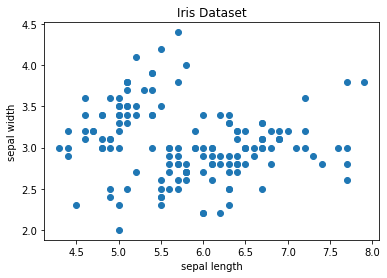

In [8]:
# create a figure and axis
# ax provides a convenience method to get or set some axis properties.
fig, ax = plt.subplots()

# scatter the sepal.length against the sepal.width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

At the moment, it is hard to know which properties belong to different varieties or classes. By adding some color or somestyling to each data point we can add more meaning the last chart.

### MPL Styling: Adding different markers <a name="scatter-styling-markers"/>

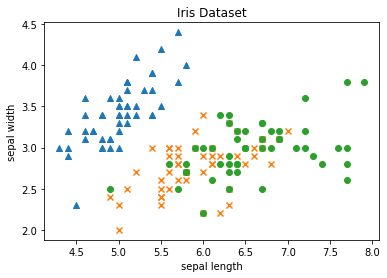

In [9]:
# create a figure and axis
# ax provides a convenience method to get or set some axis properties.
fig, ax = plt.subplots()

group1 = iris[iris['species']=='setosa']
group2 = iris[iris['species']=='versicolor']
group3 = iris[iris['species']=='virginica']

# scatter the sepal_length against the sepal_width
# By adding a marker MPL will assign some default colors
ax.scatter(group1['sepal_length'], group1['sepal_width'], marker='^')
ax.scatter(group2['sepal_length'], group2['sepal_width'], marker='x')
ax.scatter(group3['sepal_length'], group3['sepal_width'], marker='o')
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
plt.show()

### MPL Styling: Customise Color <a name="scatter-styling-color"/>

The basic colors available are:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

We can either use a single letter or writing the color name. Let's use subplots and some add some styling.

Text(0, 0.5, 'sepal width')

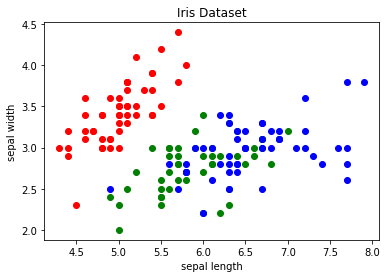

In [10]:
# create color dictionary mapping the class with a color
basic_colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}
# create a figure and axis
fig, ax = plt.subplots()

# For loop to set a color per data point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=basic_colors[iris['species'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

In [11]:
# Shape returns the number of rows and columns in the dataset
rows, columns = iris.shape
# Let's create a function that receives a color dictionary as a parameter
# Tip: It is a good practice to reuse code as much a as possible. Functions in Python are perfect for that !
def display_scatter(colors):
    # create a figure and axis
    fig, ax = plt.subplots()

    # For loop to set a color per data point
    for i in range(rows):
        ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['species'][i]])
    # set a title and labels
    ax.set_title('Iris Dataset')
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')

**Note:** Gray shades can be given as a string encoding a float in the 0-1 range. Ranging from black to white.

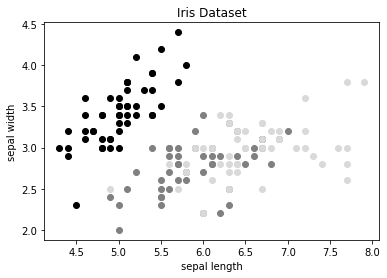

In [12]:
gray_colors = {'setosa':'0', 'versicolor':'0.5', 'virginica':'0.85'}
display_scatter(gray_colors)

We can also specify custom colors in hexadecimal format. More information about the color API [here](https://matplotlib.org/2.0.2/api/colors_api.html).

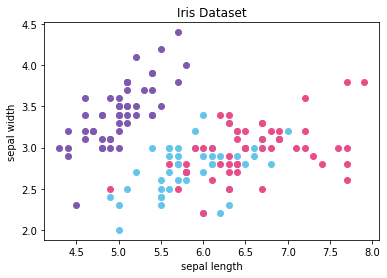

In [13]:
# Create custom color dictionary mapping the class with a hex color
custom_colors = {'setosa':'#7F58AF', 'versicolor':'#64C5EB', 'virginica':'#E84D8A'}
display_scatter(custom_colors)

#### Scatterplot Matrices

Sometimes you might want to plot a scatter matrix which allows you to plot a grid of pairwise relationships in a dataset.

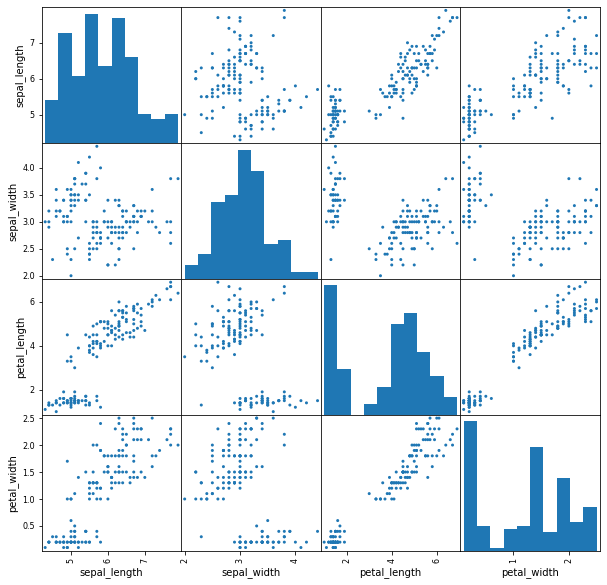

In [14]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10,10))
scatter_matrix(iris_parts, alpha=1, ax=ax)
plt.show()

## 5. Bar Chart <a name="bar"/>

Text(0, 0.5, 'Frequency')

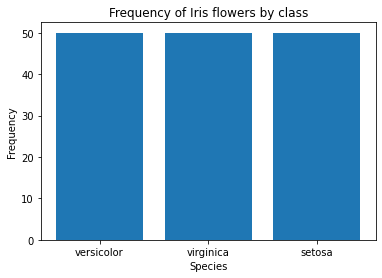

In [15]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = iris['species'].value_counts() 
# get x and y data 
variety = data.index 
frequency = data.values 
# create bar chart 
ax.bar(variety, frequency) 
# set title and labels 
ax.set_title('Frequency of Iris flowers by class') 
ax.set_xlabel('Species') 
ax.set_ylabel('Frequency')

They look all the same which is not a surprise once we check the distrubution of the classes in the iris dataset.

In [16]:
iris['species'].value_counts() 

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [17]:
# Let's create another function to display our Bar chart
def display_bar(dataset, colors):
    # Shape returns the number of rows and columns in the dataset
    rows, columns = dataset.shape
    # create a figure and axis 
    fig, ax = plt.subplots() 
    # count the occurrence of each class 
    data = iris['species'].value_counts()
    
    # For loop to set a color per data point
    for i in range(rows):
        # get x and y data 
        variety = dataset['species'][i]
        frequency = dataset['species'].value_counts()[dataset['species'][i]]
        ax.bar(variety, frequency, color=colors[dataset['species'][i]])
        
    # set title and labels 
    ax.set_title('Frequency of Iris flowers by class') 
    ax.set_xlabel('Species') 
    ax.set_ylabel('Frequency')

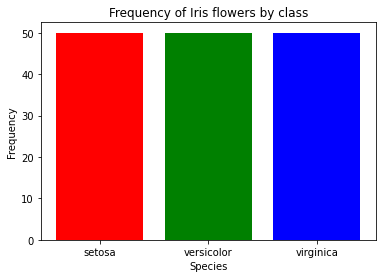

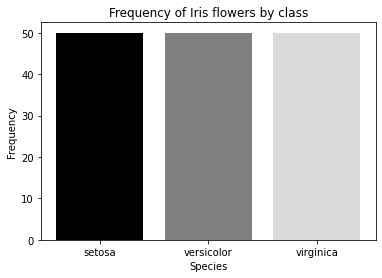

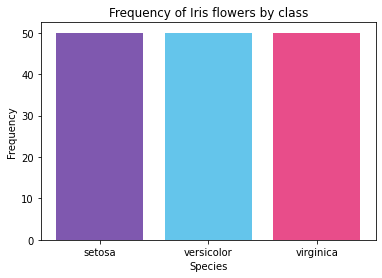

In [18]:
display_bar(iris, basic_colors)
display_bar(iris, gray_colors)
display_bar(iris, custom_colors)

Now let's try to create a more useful bar chart. Imagine that you are interested to see the frequency of iris flowers which have a minimum length (given in centimeters)

In [19]:
def iris_minimum_sepal_length(length_cm):
    # use reset index to map correctly the new indices for the new dataset we are creating
    return iris[iris['sepal_length'] >= length_cm].reset_index(drop=True)

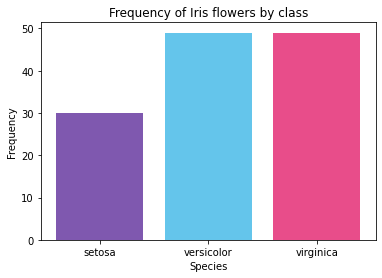

In [20]:
display_bar(iris_minimum_sepal_length(5), custom_colors)

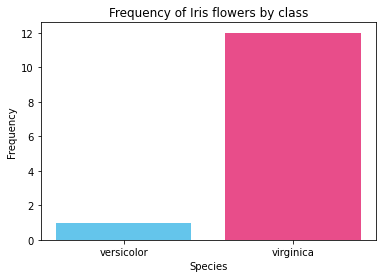

In [21]:
display_bar(iris_minimum_sepal_length(7), custom_colors)

### Useful functions <a name="bar-useful"/>

In [22]:
# Official documentation in https://docs.python.org/2/library/operator.html
import operator

Some logical operations available:

- gt = Equivalent to '>'
- lt = Equivalent to '<'
- ge = Equivalent to '>='
- le = Equivalent to '<='
- eq = Equivalent to '=='
- ne = Equivalent to '!='

Using <code>getattr</code> and <code>operator</code> we can create conditionals programatically.

Used like this:
<code>getattr(operator,'logical_operation')(param1,param2)</code>

In [23]:
# Examples
print(getattr(operator,'gt')(10,20))
print(getattr(operator,'lt')(10,20))

False
True


In [24]:
def iris_with_params(name_column, op, size_cm):
    # use reset index to map correctly the new indices for the new dataset we are creating
    return iris[getattr(operator, op)(iris[name_column], size_cm)].reset_index(drop=True)
    # Compare how it changes with respect to the last function
    # return iris[iris[name_column] >= size_cm].reset_index(drop=True)

Let's try displaying some bar charts again with different parameters

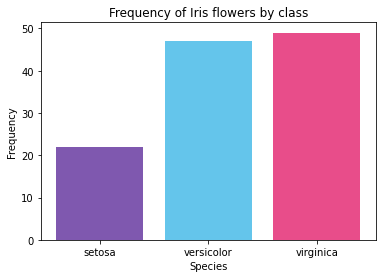

In [25]:
# Show frequency of iris flowers with a sepal length greater than 5
display_bar(iris_with_params('sepal_length','gt',5), custom_colors)

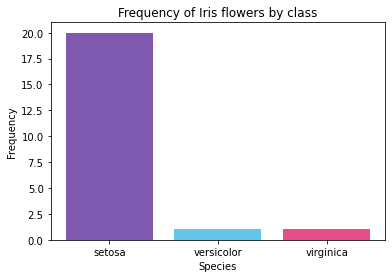

In [26]:
# Show frequency of iris flowers with a sepal length lower than 5
display_bar(iris_with_params('sepal_length','lt',5), custom_colors)

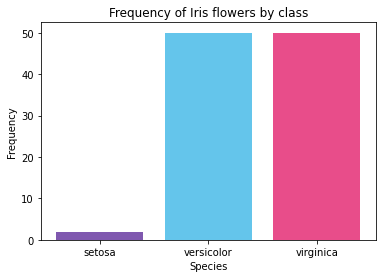

In [27]:
# Show frquency of iris flowers with a petal width greater or equal than 0.5
display_bar(iris_with_params('petal_width','ge',0.5), custom_colors)

# 6. Histograms <a name="histogram"/>

According to [Wikipedia](https://en.wikipedia.org/wiki/Histogram): 
> A histogram is an approximate representation of the distribution... To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.

-0.033441386315863575 0.9743717627808806


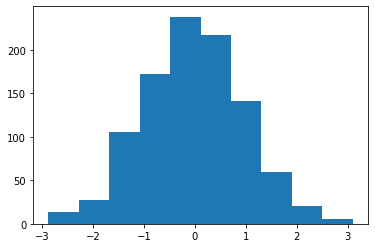

In [28]:
# Fixing the seed helps with reproducibility of the experiments
np.random.seed(2020)
# Let's generate a random list of number with a normal distribution
x = np.random.normal(size=1000)
# Let's check the mean and std
print(x.mean(),x.std())
# Let's use the numpy function for a histogram
plt.hist(x, bins = 10)
plt.show()

#### Exercise
Let\'s practice some of the key concepts we have learned so far. Using the same data in <code>x</code> for the histogram:

In [30]:
# 1. Create a function that receives the number of bins and allow to plot a histogram

def plot_hist(x, num_bins):
    # COMPLETE CODE HERE
    print('Complete code')
    
    
    

# 2. Modify the last function to plot the histogram for values greater than the standard deviation of the data.
def plot_hist_gt_std(x, num_bins):
    # COMPLETE CODE HERE
    print('Complete code')
    
    
    
# 3. Create a function that allow you to plot the histogram of values dinamically using 'getattr' and 'operator'
def plot_hist_with_parameters(x, num_bins, value, operation):
    # COMPLETE CODE HERE
    print('Complete code')
    
    
    

#### Solution

Histogram with 10 bins


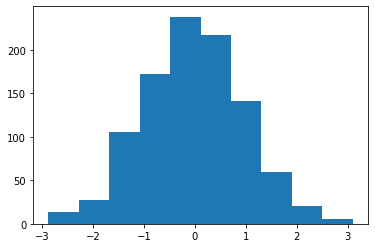

Histogram for values greater than 0.9743717627808806


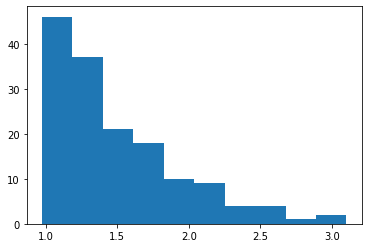

num_bins=20 operation=gt value=2


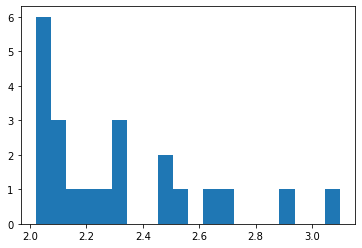

num_bins=20 operation=lt value=0


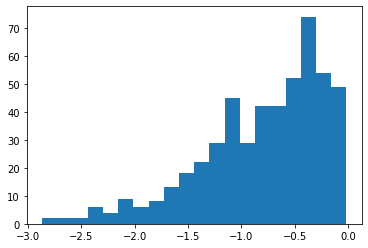

In [31]:
# 1. Create a function that receives the number of bins and allow to plot a histogram
def plot_hist(x, num_bins):
    print(f'Histogram with {num_bins} bins')
    plt.hist(x, bins = num_bins)
    plt.show()

# 2. Modify the last function to plot the histogram for values greater than the standard deviation of the data.
def plot_hist_gt_std(x, num_bins):
    print(f'Histogram for values greater than {x.std()}')
    # You can use conditional selection in numpy like this:
    above_std = x[x > x.std()]
    plt.hist(above_std, bins = num_bins)
    plt.show()
    
def plot_hist_with_parameters(x, num_bins, value, operation):
    print(f'num_bins={num_bins} operation={operation} value={value}')
    x2 = x[getattr(operator, operation)(x, value)]
    plt.hist(x2, bins = num_bins)
    plt.show()

# Let's test this new functions
plot_hist(x, 10)
plot_hist_gt_std(x, 10)
# This allow us to plot a histogram with 20 bins for the values that are greater than 2.
plot_hist_with_parameters(x, 20, 2 ,'gt')
# This allow us to plot a histogram with 20 bins for the negative values.
plot_hist_with_parameters(x, 20, 0 ,'lt')

# Change the values and check how different parameters produces different plots

## Line Chart <a name="line"/>

You can also plot everything in one line like this:

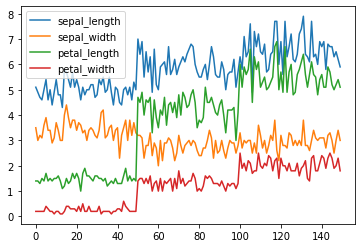

In [32]:
iris[iris_columns].plot.line()

You can specify the data you want to plot with a subplot like the example below:

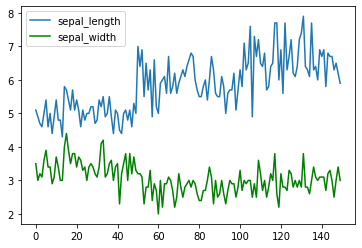

In [33]:
# create a figure and axis 
fig, ax = plt.subplots() 
# gca stands for 'get current axis'
ax = plt.gca()
iris_parts.plot(kind='line',y='sepal_length', ax=ax)
iris_parts.plot(kind='line',y='sepal_width', color='green', ax=ax)
plt.show()

# MPL Line Styling <a name="line-styling"/>

Now let's do some styling:

More information about linestyling [here](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

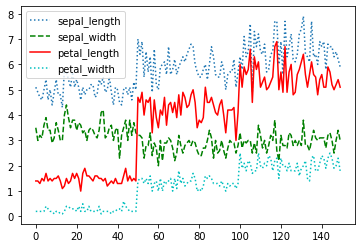

In [34]:
#Some examples of linestyling
# create a figure and axis 
fig, ax = plt.subplots() 
# gca stands for 'get current axis'
ax = plt.gca()
iris_parts.plot(kind='line',y='sepal_length', linestyle='dotted',ax=ax)
iris_parts.plot(kind='line',y='sepal_width', linestyle='--',color='green', ax=ax)
iris_parts.plot(kind='line',y='petal_length',linestyle='-',color='red', ax=ax)
iris_parts.plot(kind='line',y='petal_width', linestyle=':',color='c', ax=ax)
plt.show()

### MPL Styling: Adding Colourmaps  and more subplots<a name="line-styling-colourmap"/>

Sometimes you want to change to colors for a predefined color palette. MPL supports many color maps that can be specified in any chart using the parameter <code>cmap</code>

Find the complted list of supported colomaps in the [official documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [35]:
# Examples using some colormaps available
colormap_list = ['viridis','magma','plasma','rainbow','Dark2','hsv']

def plot_lines(ax, cmap, df):
    df.plot(kind='line', cmap=cmap, ax=ax)
    
def plot_multiple_lines(df, colormap_list):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    # Axes.flat is one the methods that allows iterating over the axes in a subplot
    for idx, ax in enumerate(axes.flat): 
        cmap = colormap_list[idx]
        plot_lines(ax, cmap, df)
        ax.set_title("Plot " + str(idx))
    plt.tight_layout()
    plt.show()

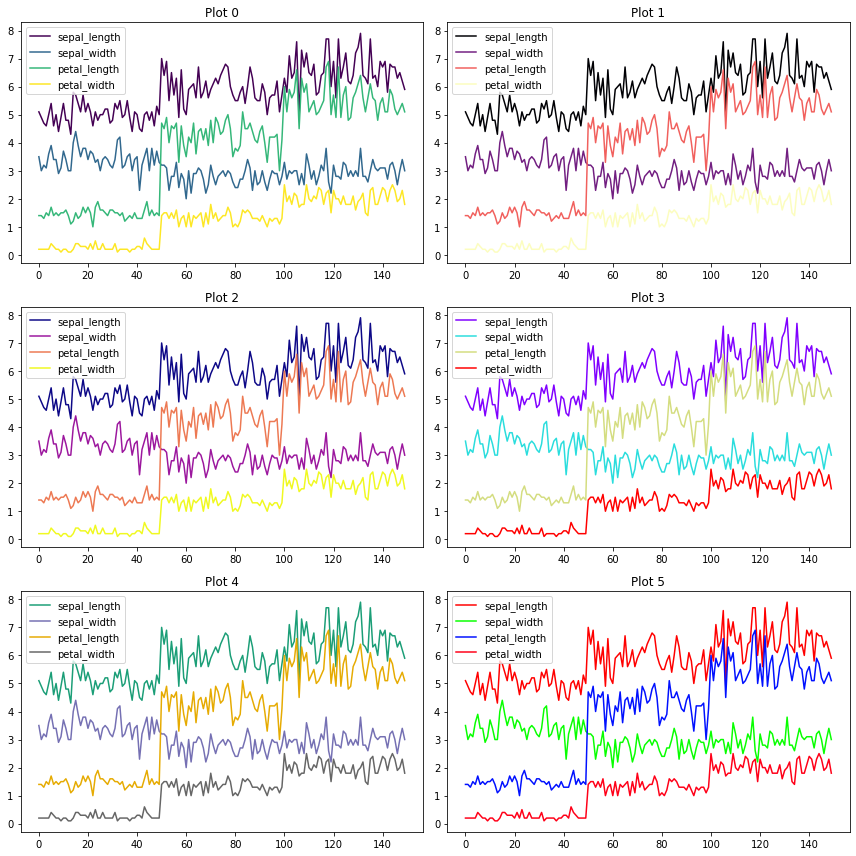

In [36]:
plot_multiple_lines(iris_parts, colormap_list)

#### Exercise

1. Try different values of colormaps for the <code>plot_multiple_lines</code>
2. Modify the function <code>plot_multiple_lines</code> so it shows the plots in 3 columns and 2 rows.

# Seaborn <a name="seaborn"/>

From the [Seaborn documentation](https://seaborn.pydata.org/)

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Giving that this library is based in matplotlib, it is possible to style the plots using some of the styling tricks from matplotlib. However, it provides more advanced plots with less code.


## Seaborn Basic Plots <a name="seaborn-basics"/>

We will start by plotting some of the charts that we have already used in this notebook. We will use some of the example code from the official documentation.

### Scatter plot

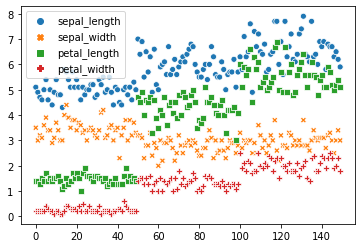

In [37]:
sns.scatterplot(data=iris_parts)
plt.show()

### Histogram

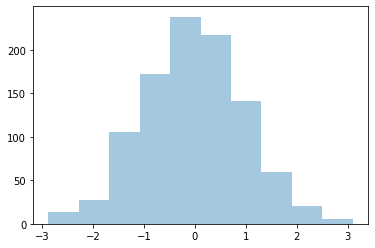

In [38]:
sns.distplot(x, bins=10, kde=False)
plt.show()

### Bar plots

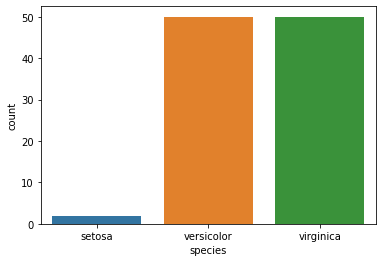

In [39]:
data = iris_with_params('petal_width','ge',0.5)['species'].value_counts()

sns.countplot(x="species", data=iris_with_params('petal_width','ge',0.5))
plt.show()

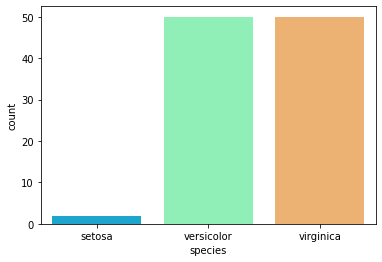

In [40]:
# Change the palette
sns.countplot(x="species", data=iris_with_params('petal_width','ge',0.5), palette='rainbow')
plt.show()

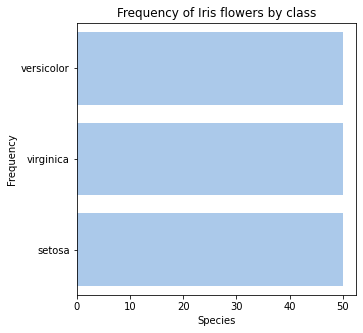

In [41]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# count the occurrence of each class 
data = iris['species'].value_counts() 
# get x and y data 
variety = data.index 
frequency = data.values 
# set title and labels 
ax.set_title('Frequency of Iris flowers by class') 
ax.set_xlabel('Species') 
ax.set_ylabel('Frequency')
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=frequency, y=variety, color="b")
plt.show()

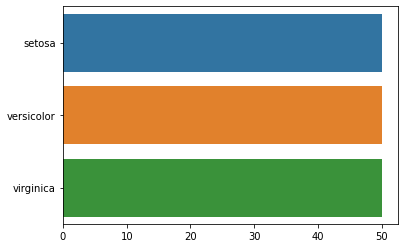

In [42]:
# Change the color palette. Equivalent of cmap in MPL
sns.color_palette("muted")
# Change order
sns.barplot(x=frequency, y=variety, order=["setosa", "versicolor","virginica"])
plt.show()

### Line plot

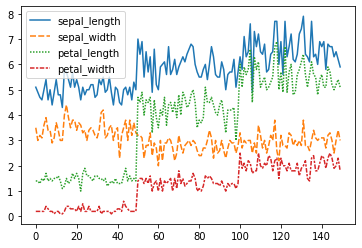

In [43]:
sns.lineplot(data=iris_parts)
plt.show()

# Notice how seaborn adds by default color and line styles

### Scatter / Pairplot

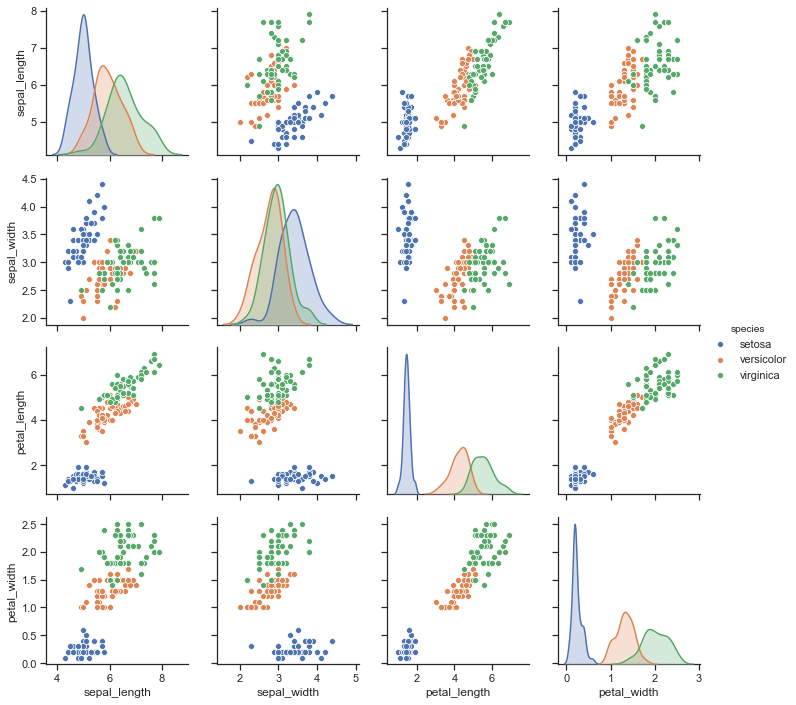

In [44]:
import seaborn as sns
sns.set(style="ticks")
# Pairplot is the equivalent to scatter plots in MPL
sns.pairplot(iris, hue="species")
plt.show()

# Other plots <a name="seaborn-others"/>

### Boxplot

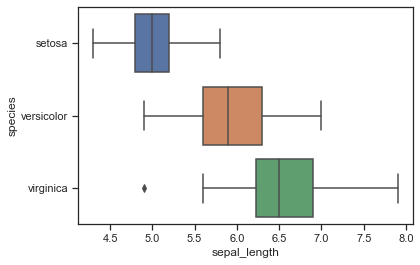

In [45]:
# This plot shows the boxplots w.r.t variety and sepal length
df = iris[(iris['sepal_length']>=2)]
sns.boxplot('sepal_length', 'species', data=df)
plt.show()

### Multiple Linear Regression

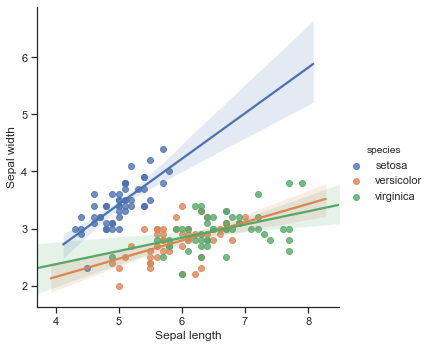

In [46]:
# Plot sepal width as a function of sepal length
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               height=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length", "Sepal width")
plt.show()

#### Heatmaps

Seaborn have interesting functions to create useful plots such as heatmap

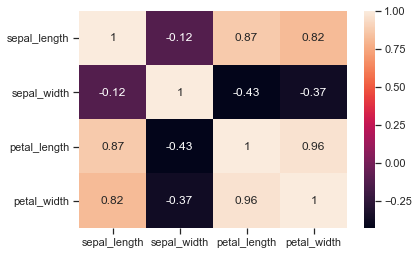

In [47]:
# This heatmap shows the correlation between variables for the iris dataset in just one line of code !
sns.heatmap(iris.corr(), annot=True)
plt.show()

Seaborn provides many more useful plots.

Check some of the example [here](https://seaborn.pydata.org/tutorial)

## References and further reading
The following sources have been used in the creation of this notebook:
- [Matplotlib documentation](https://matplotlib.org/3.2.2/contents.html)
- [Seaborn documentation](https://seaborn.pydata.org/)
- [Introduction to Data Visualization in Python](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed)
- [How to plot a Histogram in Python](https://datatofish.com/plot-histogram-python/)

Many more examples:

- [Seaborn examples](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib examples](https://matplotlib.org/3.2.2/tutorials/introductory/sample_plots.html)
- [3D Plotting](https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725)